In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

## Create dataframe from .csv files

In [2]:
area = "Seattle, WA"
path = "./data/"+area
vendor_info_df = pd.read_csv(path + "_vendor_info.csv")
listing_info_df = pd.read_csv(path + "_listing_info.csv")
aptType_info_df = pd.read_csv(path + "_aptType_info.csv")
amenities_info_df =pd.read_csv(path + "_amenites_info.csv")

## For later reference we'll also do important merges of data during this junction as well

In [3]:
vendor_listings_df = pd.merge(left = vendor_info_df, right = listing_info_df, left_on="propertyName", right_on="propertyName")
vendor_amenities = pd.merge(left = vendor_info_df, right = amenities_info_df, left_on="propertyName", right_on="propertyName")

## Whilst we while be doing some exploratory analysis below, here is an auto generated report on vendor_listings

In [4]:
report = pp.ProfileReport(vendor_listings_df)
report.to_file("./data/vendor_listings.html")

In [5]:
report = pp.ProfileReport(vendor_amenities)
report.to_file("./data/vendor_amenities.html")

## Lets generate summary statistics to get a picture of where we're working with 

### Step one generate descripative stats for vendor_info_df

In [6]:
print("The shape of the data is {}".format(vendor_info_df.shape))
print("The size of the data is {}".format(vendor_info_df.size))

The shape of the data is (752, 11)
The size of the data is 8272


#### Let's see what the info method will tell us about the dataframe

In [7]:
vendor_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    752 non-null    int64 
 1   propertyName  752 non-null    object
 2   street        752 non-null    object
 3   city          752 non-null    object
 4   state         752 non-null    object
 5   zipCode       752 non-null    int64 
 6   neighborhood  748 non-null    object
 7   reviewScore   752 non-null    int64 
 8   reviewCount   752 non-null    int64 
 9   walkScore     752 non-null    int64 
 10  transitScore  752 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 64.8+ KB


#### Now let's take the summary statistics for for the quantitative columns and represent then them as the transpose to reduce space 

In [8]:
vendor_info_df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,752.0,375.500000,217.227991,0.0,187.75,375.5,563.25,751.0
zipCode,752.0,98119.067819,19.145165,98101.0,98106.00,98116.0,98122.00,98199.0
reviewScore,752.0,1.162234,2.029807,0.0,0.00,0.0,2.00,5.0
reviewCount,752.0,1.884309,6.840676,0.0,0.00,0.0,1.00,150.0
walkScore,752.0,84.167553,17.569830,9.0,75.75,91.0,97.00,100.0
transitScore,752.0,68.962766,22.111175,0.0,54.00,64.0,86.00,100.0


#### Lets repeat the process for all object columns now

In [9]:
vendor_info_df.describe(include=[np.object]).T

,count,unique,top,freq
propertyName,752,697,Ballard 57 Apartments,2
street,752,697,4200 S Othello St,2
city,752,4,Seattle,748
state,752,1,WA,752
neighborhood,748,87,Capitol Hill,48


## We'll now run through these same sets but for our Vendor listing df

In [10]:
print("The shape of the data is {}".format(vendor_listings_df.shape))
print("The size of the data is {}".format(vendor_listings_df.size))

The shape of the data is (13644, 24)
The size of the data is 327456


In [11]:
vendor_listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13644 entries, 0 to 13643
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0_x   13644 non-null  int64  
 1   propertyName   13644 non-null  object 
 2   street         13644 non-null  object 
 3   city           13644 non-null  object 
 4   state          13644 non-null  object 
 5   zipCode        13644 non-null  int64  
 6   neighborhood   13640 non-null  object 
 7   reviewScore    13644 non-null  int64  
 8   reviewCount    13644 non-null  int64  
 9   walkScore      13644 non-null  int64  
 10  transitScore   13644 non-null  int64  
 11  Unnamed: 0_y   13644 non-null  int64  
 12  bedRoomType    13644 non-null  object 
 13  bedRoomNumber  13644 non-null  int64  
 14  baths          13644 non-null  float64
 15  rent           9512 non-null   float64
 16  sqft           13431 non-null  float64
 17  availability   13644 non-null  bool   
 18  deposi

In [12]:
vendor_listings_df.describe(include=[np.number], percentiles=[0.25,0.5, 0.75, 0.9, 0.95, 0.99, .995 ]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,99.5%,max
Unnamed: 0_x,13644.0,239.020595,223.031947,0.0,58.0,161.0,365.25,670.0,711.00,745.0,748.0,751.0
zipCode,13644.0,98116.881999,14.622098,98101.0,98108.0,98115.0,98122.00,98126.0,98144.00,98188.0,98198.0,98199.0
reviewScore,13644.0,1.558341,2.264788,0.0,0.0,0.0,5.00,5.0,5.00,5.0,5.0,5.0
reviewCount,13644.0,3.469584,7.751635,0.0,0.0,1.0,4.00,10.0,15.00,24.0,53.0,150.0
walkScore,13644.0,90.798300,12.174412,9.0,90.0,96.0,98.00,99.0,99.00,100.0,100.0,100.0
transitScore,13644.0,77.049546,20.859721,0.0,59.0,82.0,100.00,100.0,100.00,100.0,100.0,100.0
Unnamed: 0_y,13644.0,5480.078789,3352.311984,0.0,2532.0,5383.5,8705.25,10050.0,10408.85,10693.0,10727.0,10761.0
bedRoomNumber,13644.0,1.283714,0.506119,1.0,1.0,1.0,2.00,2.0,2.00,3.0,3.0,6.0
baths,13644.0,1.227792,0.441755,0.0,1.0,1.0,1.00,2.0,2.00,2.5,3.0,5.0
rent,9512.0,2363.218671,1155.945331,625.0,1720.0,2110.0,2703.00,3434.0,4045.70,7050.0,8830.0,15160.0


In [13]:
vendor_listings_df.describe(include=[np.object]).T

,count,unique,top,freq
propertyName,13644,697,Batik,440
street,13644,697,123 Broadway,440
city,13644,4,Seattle,13603
state,13644,1,WA,13644
neighborhood,13640,87,South Lake Union,1611
bedRoomType,13644,2,Traditional,10842
unit,4531,1726,406,39
name,13309,4476,Studio,405
new,523,1,New,523
applyNow,335,2,Request To Apply,323


### Let's now have it return the top 5 listings based on rent

In [14]:
vendor_listings_df.sort_values("rent", ascending=False).drop_duplicates(subset="propertyName").head()

,Unnamed: 0_x,propertyName,street,city,state,zipCode,neighborhood,reviewScore,reviewCount,walkScore,...,baths,rent,sqft,availability,deposit,unit,leaseLength,name,new,applyNow
4717,56,McKenzie,2202 Eighth Ave,Seattle,WA,98121,Denny Triangle,0,23,100,...,3.0,15160.0,2584.0,False,NaN,NaN,NaN,Penthouse C,NaN,NaN
1954,18,Helm,625 Boren Ave,Seattle,WA,98109,South Lake Union,0,8,96,...,2.0,12500.0,2601.0,True,NaN,NaN,NaN,PH.5D,NaN,NaN
650,4,Tower 12,2015 2nd Ave,Seattle,WA,98121,Pike Place Market,0,4,98,...,2.0,11035.0,1732.0,False,NaN,NaN,NaN,Plan PH2 Penthouse,NaN,NaN
6371,64,Kiara,111 Terry Ave N,Seattle,WA,98109,South Lake Union,5,0,99,...,3.0,10865.0,1948.0,False,NaN,3606,NaN,3 Bedroom DPH,NaN,NaN
2008,19,Mera,630 Boren Ave N,Seattle,WA,98109,South Lake Union,0,2,97,...,2.0,10275.0,1905.0,False,NaN,NaN,NaN,PH.4,NaN,NaN


### Lets have it do the same sort but this time based on sqft

In [15]:
vendor_listings_df.sort_values("sqft", ascending=False).head()

,Unnamed: 0_x,propertyName,street,city,state,zipCode,neighborhood,reviewScore,reviewCount,walkScore,...,baths,rent,sqft,availability,deposit,unit,leaseLength,name,new,applyNow
13583,667,5 bedroom in Seattle WA 98125,10514 Riviera Pl NE,Seattle,WA,98125,Lake City,0,0,21,...,5.0,9800.0,4380.0,True,NaN,NaN,NaN,NaN,NaN,NaN
13614,703,"4 br, 3 bath House - 10044 46TH PL NE",10044 46th Pl NE,Seattle,WA,98125,Lake City,0,0,19,...,3.0,3850.0,3380.0,True,NaN,NaN,NaN,NaN,NaN,NaN
13515,595,1310 Lakeside Ave S,1310 Lakeside Ave S,Seattle,WA,98144,Leschi,0,0,43,...,2.0,6000.0,3000.0,True,NaN,NaN,NaN,NaN,NaN,Request To Apply
13465,539,6244 25th Ave NE,6244 25th Ave NE,Seattle,WA,98115,Seattle,0,0,81,...,4.0,4000.0,3000.0,True,4000.0,NaN,NaN,NaN,NaN,Request To Apply
13631,723,2425 Montavista Pl W,2425 Montavista Pl W,Seattle,WA,98199,Briarcliff,0,0,72,...,3.5,5395.0,2950.0,True,NaN,NaN,NaN,NaN,NaN,NaN


### Repeat the process but this time we'll inspect the minimums 

In [16]:
vendor_listings_df.sort_values("rent").drop_duplicates(subset="propertyName").head()

,Unnamed: 0_x,propertyName,street,city,state,zipCode,neighborhood,reviewScore,reviewCount,walkScore,...,baths,rent,sqft,availability,deposit,unit,leaseLength,name,new,applyNow
13498,576,414 10th Ave,414 10th Ave,Seattle,WA,98122,Minor,0,0,94,...,2.5,625.0,200.0,True,350.0,NaN,NaN,NaN,NaN,Request To Apply
13499,577,621 S King St Unit 6,621 S King St Unit 6,Seattle,WA,98104,Chinatown,0,0,99,...,1.0,645.0,200.0,True,400.0,6,12.0,NaN,NaN,Request To Apply
13544,625,"1 br, 1 bath Cooperative - 9256 21st Ave SW",9256 21st Ave SW,Seattle,WA,98106,South Delridge,0,0,89,...,1.0,650.0,NaN,True,NaN,NaN,NaN,NaN,NaN,Request To Apply
13432,509,8801 Aurora Ave N Unit 19,8801 Aurora Ave N Unit 19,Seattle,WA,98103,Greenwood,0,0,87,...,3.0,750.0,1800.0,True,400.0,19,1.0,NaN,NaN,Request To Apply
12878,356,Sanford Hildebrandt Seattle Active Seniors,747 N 135th St,Seattle,WA,98133,Bitter Lake,4,0,71,...,1.0,763.0,450.0,False,NaN,NaN,NaN,Studio (age 62 and up),NaN,NaN


In [17]:
vendor_listings_df.sort_values("sqft").drop_duplicates(subset="propertyName").head()

,Unnamed: 0_x,propertyName,street,city,state,zipCode,neighborhood,reviewScore,reviewCount,walkScore,...,baths,rent,sqft,availability,deposit,unit,leaseLength,name,new,applyNow
13446,522,4703 9th Ave NE Unit 6,4703 9th Ave NE Unit 6,Seattle,WA,98105,University District,0,0,96,...,0.5,800.0,90.0,True,800.0,6,3.0,NaN,NaN,NaN
13449,525,5224 Brooklyn Ave NE Unit 8,5224 Brooklyn Ave NE Unit 8,Seattle,WA,98105,University District,0,0,98,...,0.5,800.0,90.0,True,800.0,8,3.0,NaN,NaN,NaN
6093,63,Sedona Apartments,8500 20th Ave NE,Seattle,WA,98115,Wedgewood,0,4,69,...,1.0,NaN,145.0,True,NaN,H512,NaN,MIcro A,NaN,NaN
13291,394,1715 Apartments,1715 NW 58th St,Seattle,WA,98107,Seattle,0,1,98,...,1.0,975.0,145.0,False,NaN,242,NaN,Standard Unit,NaN,Request To Apply
11052,232,Addison on Fourth,308 4th Ave S,Seattle,WA,98104,Chinatown,0,5,98,...,1.0,1192.0,153.0,False,NaN,226,NaN,Standard One Bedroom,NaN,NaN


### Person correlation matrix

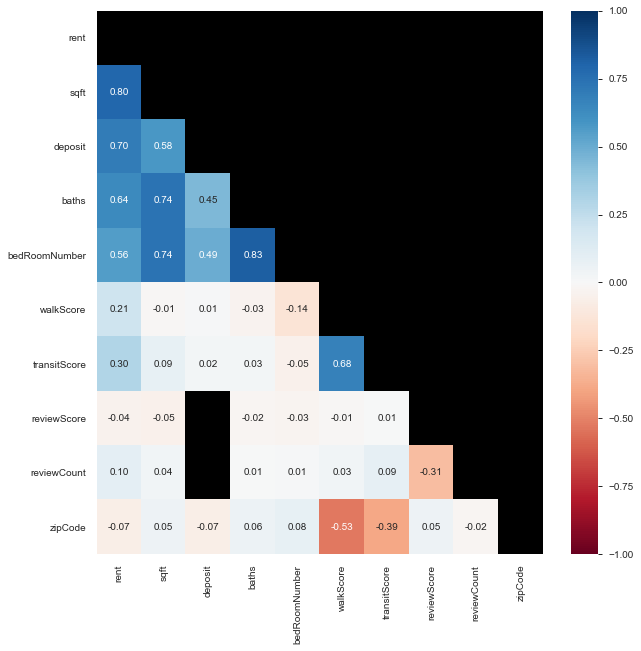

In [18]:
corr = vendor_listings_df[["rent", "sqft","deposit","baths","bedRoomNumber","walkScore","transitScore","reviewScore","reviewCount","zipCode"]].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    corr,
    mask=mask,
    fmt=".2f",
    annot=True,
    ax=ax,
    cmap="RdBu",
    vmin=-1,
    vmax=1)

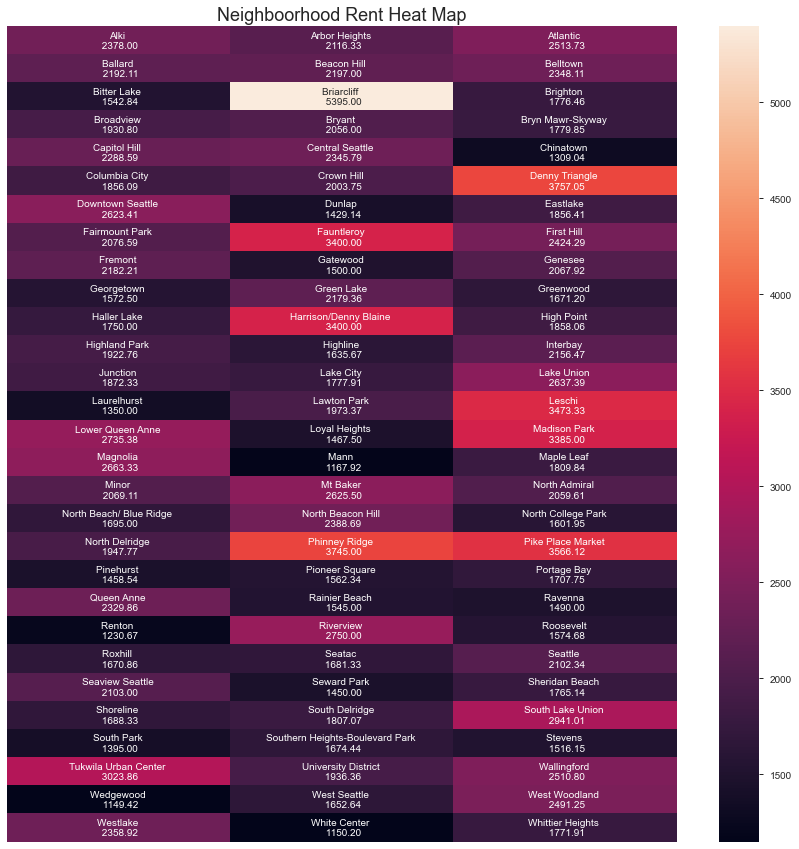

In [39]:
neighborhood_groupby = vendor_listings_df.groupby("neighborhood").mean()
neighborhood_groupby.to_csv("./data/neighborhood_mean.csv")
neighborhoods = np.asarray(neighborhood_groupby.index).reshape(29, 3)
rows = {"xrows":[], "yrows":[]}
for yrow in range(len(neighborhoods)):
    for xrow in range(len(neighborhoods[yrow])):
        rows['yrows'].append(yrow)
        rows['xrows'].append(xrow)

rows["rent"] = neighborhood_groupby["rent"].tolist()
rows["neighborhood"] = neighborhood_groupby.index.tolist()
row_df = pd.DataFrame(rows)

result = row_df.pivot(index= "yrows", columns= "xrows",values="rent")
mean_rent = np.asarray(neighborhood_groupby["rent"]).reshape(29, 3)
labels = (np.asarray(["{0} \n {1:.2f}".format(neighborhood, rent)
                         for neighborhood, rent in zip(neighborhoods.flatten(),
                                                      mean_rent.flatten())])
         ).reshape(29, 3)
fig, ax = plt.subplots(figsize = (15,15))

title = "Neighboorhood Rent Heat Map"
plt.title(title, fontsize=18)
ttl = ax.title
ttl.set_position([.5,1,.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

sns.heatmap(result, annot=labels, fmt="", ax=ax)
plt.show()

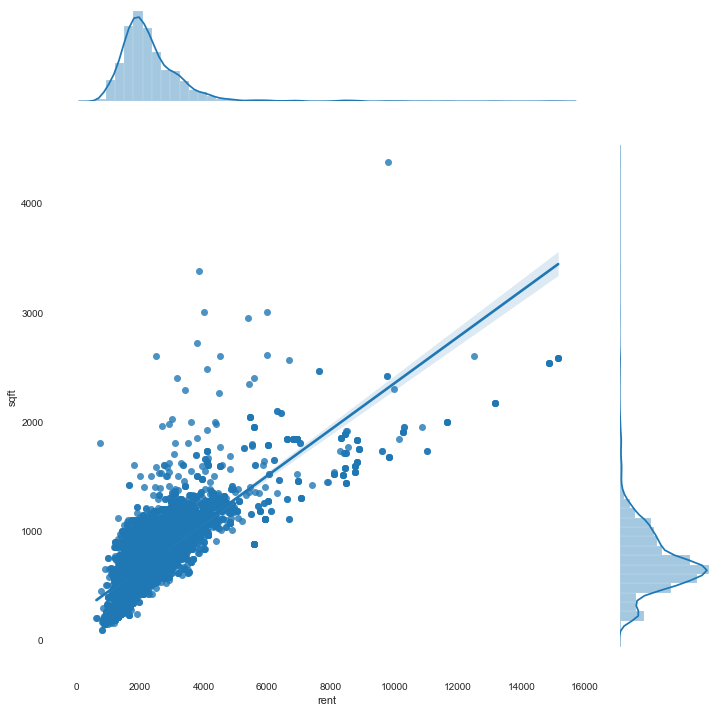

In [22]:
sns.jointplot(x="rent", y="sqft", data=vendor_listings_df, kind="reg", height=10)

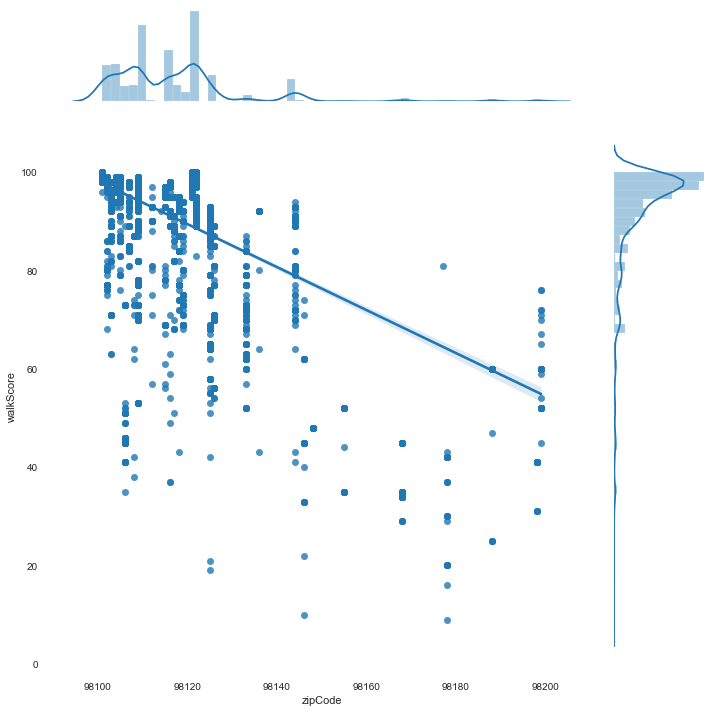

In [23]:
sns.jointplot(x="zipCode", y="walkScore", data=vendor_listings_df, kind="reg", height=10)

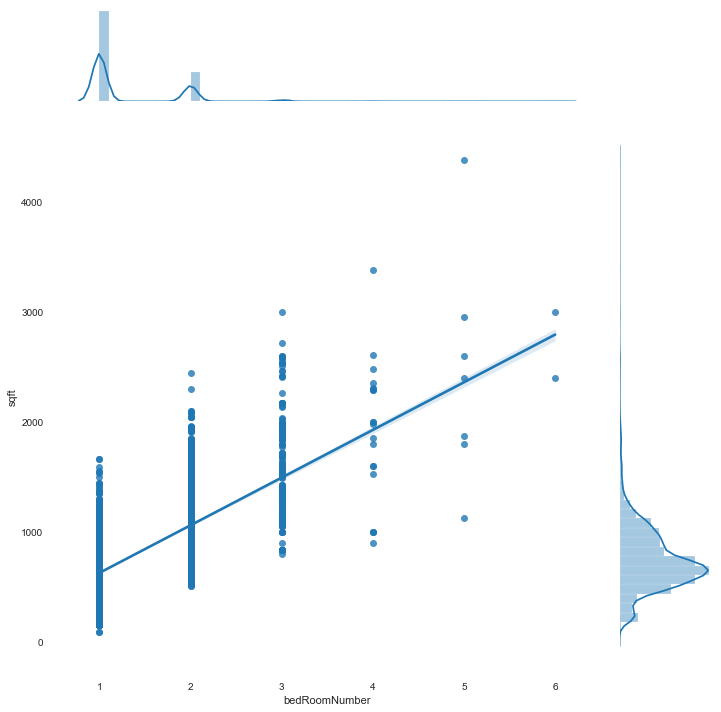

In [24]:
sns.jointplot(x="bedRoomNumber", y="sqft", data=vendor_listings_df, kind="reg", height=10)

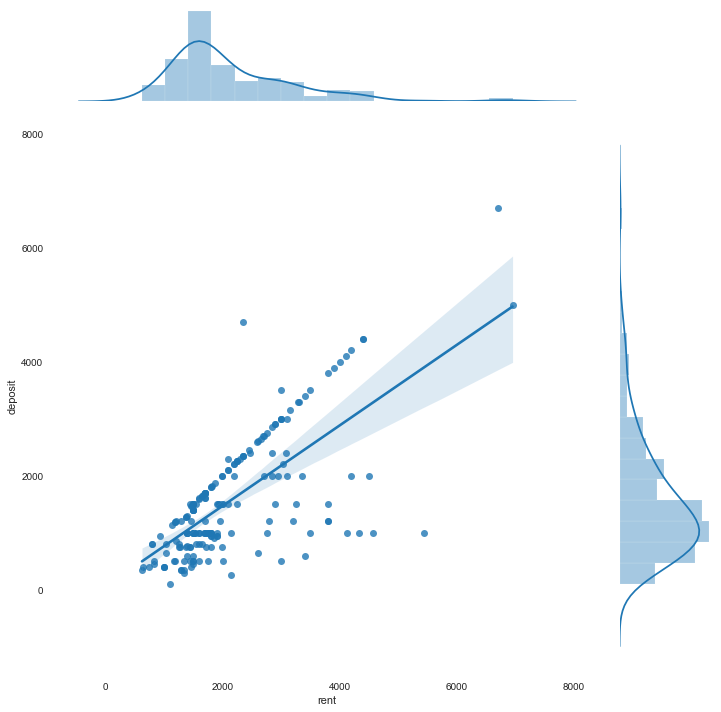

In [25]:
sns.jointplot(x="rent", y="deposit", data=vendor_listings_df, kind="reg", height=10)

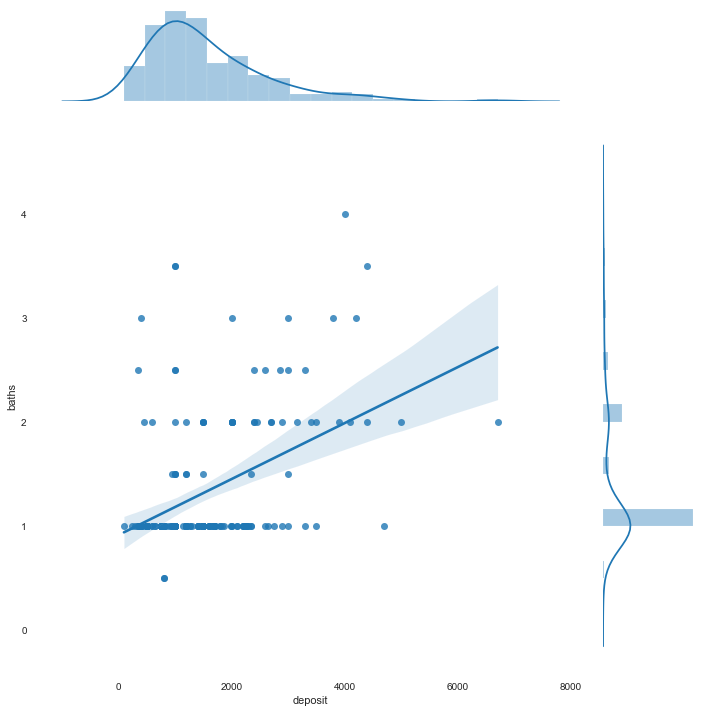

In [26]:
sns.jointplot(x="deposit", y="baths", data=vendor_listings_df, kind="reg", height=10)

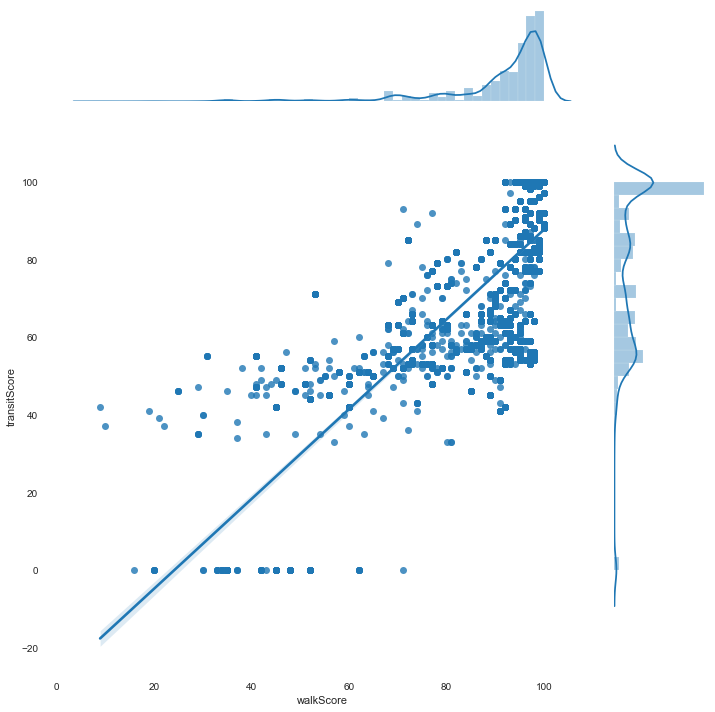

In [27]:
sns.jointplot(x="walkScore", y="transitScore", data=vendor_listings_df, kind="reg", height=10)

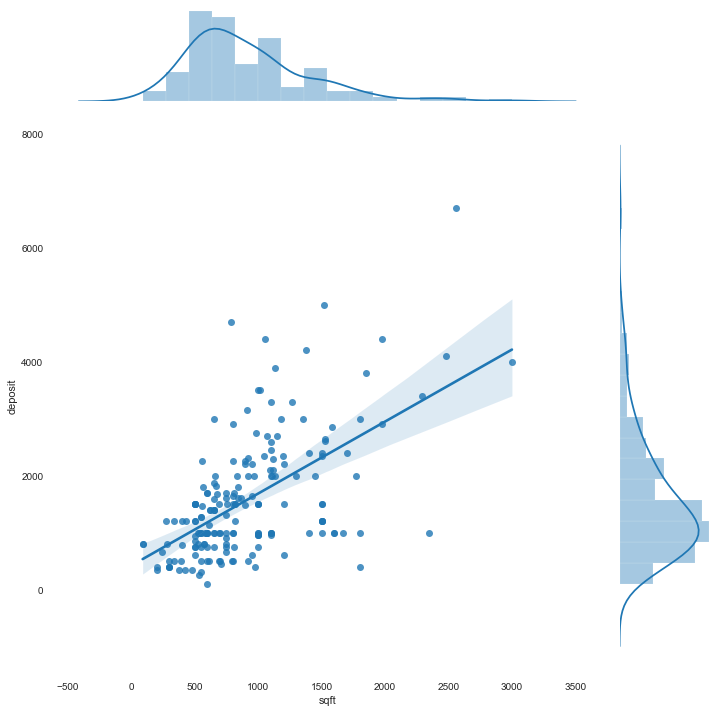

In [28]:
sns.jointplot(x="sqft", y="deposit", data=vendor_listings_df, kind="reg", height=10)

## Now lets have a visualize the data with a distribution plot, 

### We'll start with rent and use seaborn to create a histogram overlayed with the kernel density estimation or KDE

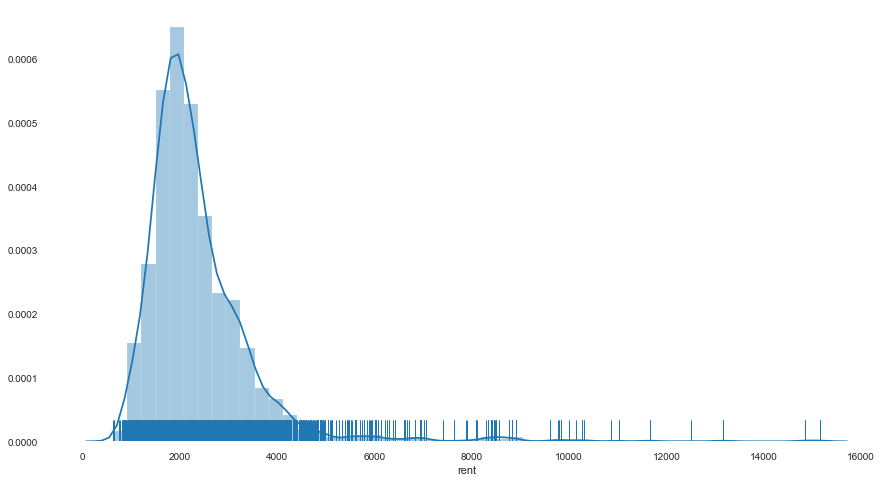

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(vendor_listings_df.rent, rug=True, ax=ax)

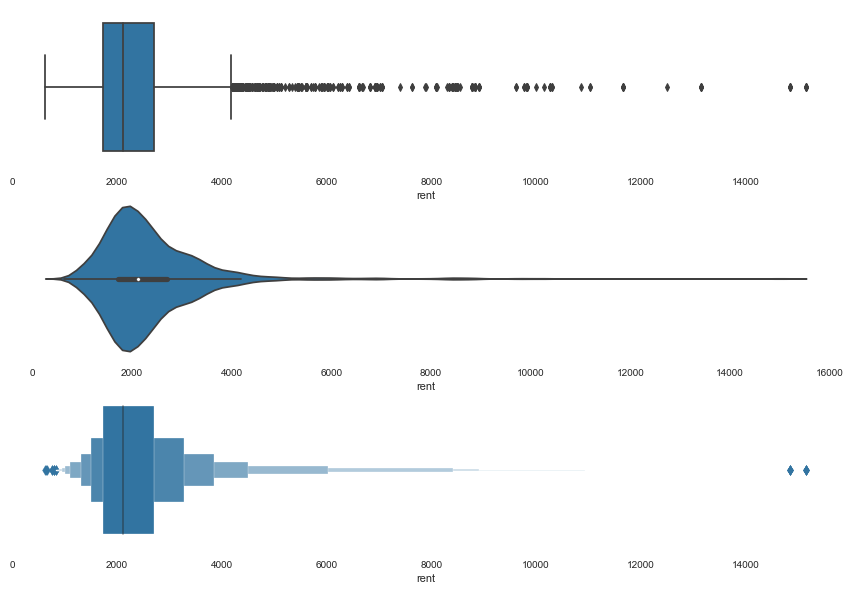

In [30]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 10))
sns.boxplot(vendor_listings_df.rent, ax=axs[0])
sns.violinplot(vendor_listings_df.rent, ax=axs[1])
sns.boxenplot(vendor_listings_df.rent, ax=axs[2])

### Lets compare rent across neighborhoods 

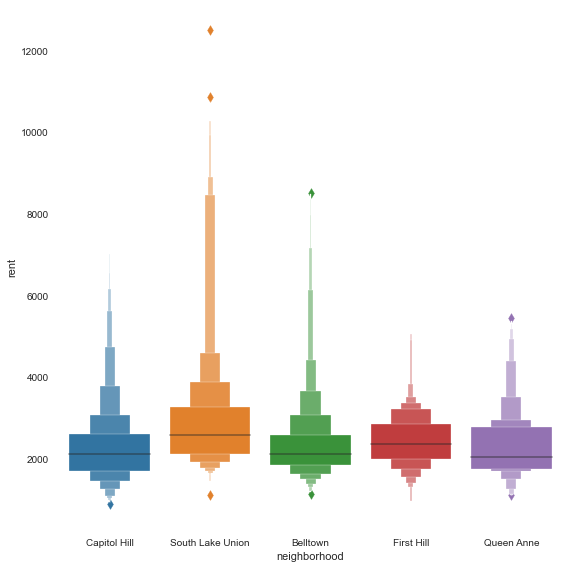

In [31]:
mask = vendor_listings_df.neighborhood.isin(["Belltown", "Capitol Hill", "First Hill", "South Lake Union", "Queen Anne"])
sns.catplot(
    x="neighborhood", y="rent", data=vendor_listings_df[mask], 
    kind="boxen",
    height = 8    
 )

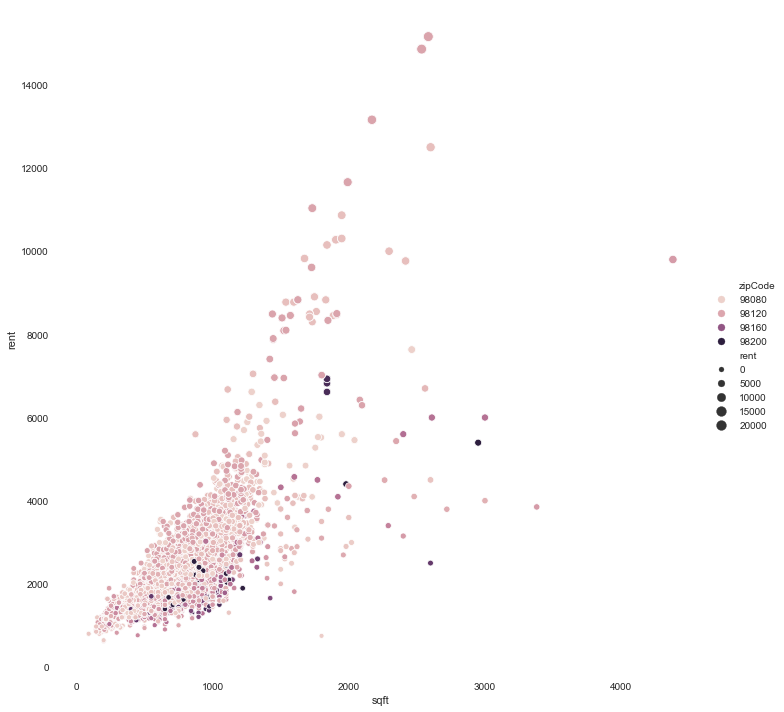

In [32]:
sns.relplot(x="sqft", y="rent", data=vendor_listings_df, hue="zipCode", size="rent", height=10)

### Repeat for second variable of interest sqft

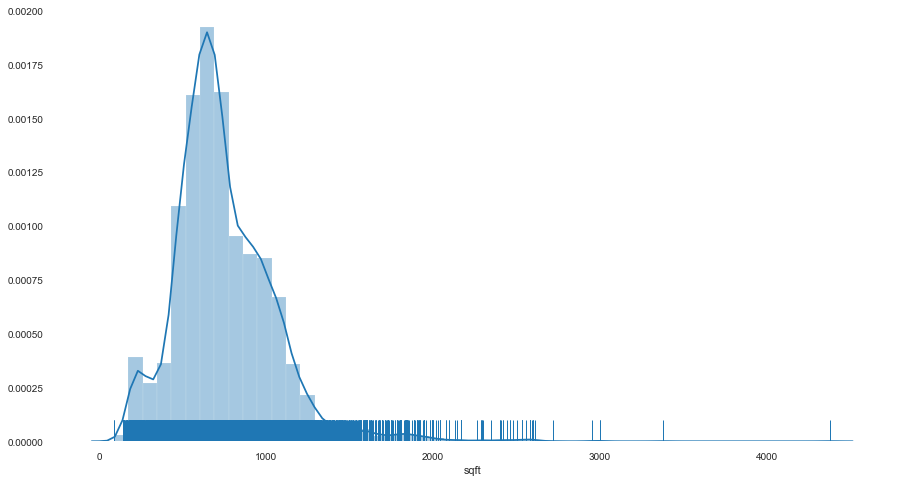

In [33]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.distplot(vendor_listings_df.sqft, rug=True, ax=ax)

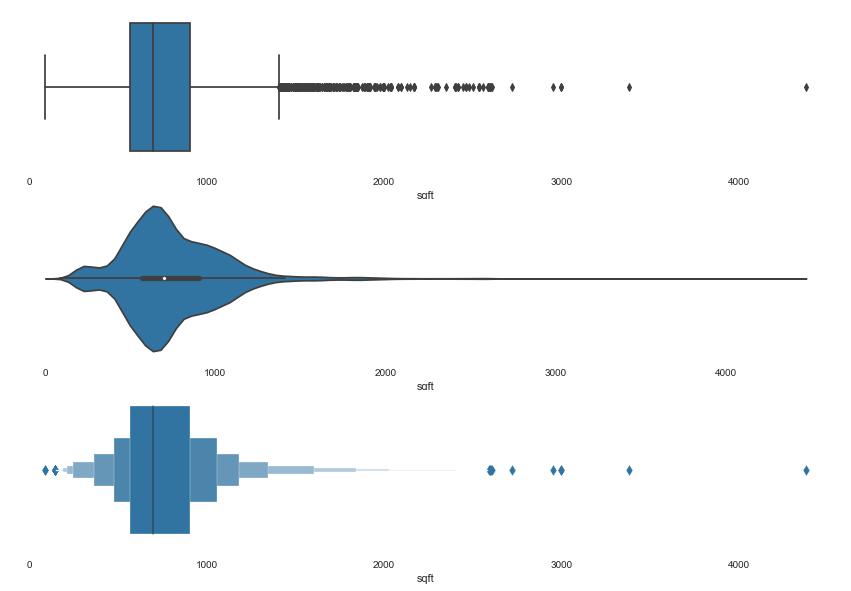

In [34]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 10))
sns.boxplot(vendor_listings_df.sqft, ax=axs[0])
sns.violinplot(vendor_listings_df.sqft, ax=axs[1])
sns.boxenplot(vendor_listings_df.sqft, ax=axs[2])

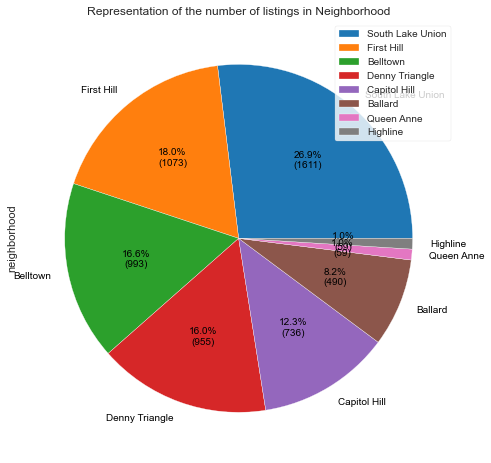

In [35]:
neighborhood_counts = vendor_listings_df.neighborhood.value_counts().to_frame()
display_df = neighborhood_counts['South Lake Union':'Denny Triangle']
display_df = display_df.append(neighborhood_counts['Capitol Hill':'Ballard'])
display_df = display_df.append(neighborhood_counts['Queen Anne':'Highline'])
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
display_df.plot.pie(y='neighborhood', figsize=(8, 8), title="Representation of the number of listings in Neighborhood",autopct=lambda pct: func(pct, display_df.neighborhood), textprops=dict(color="black"))

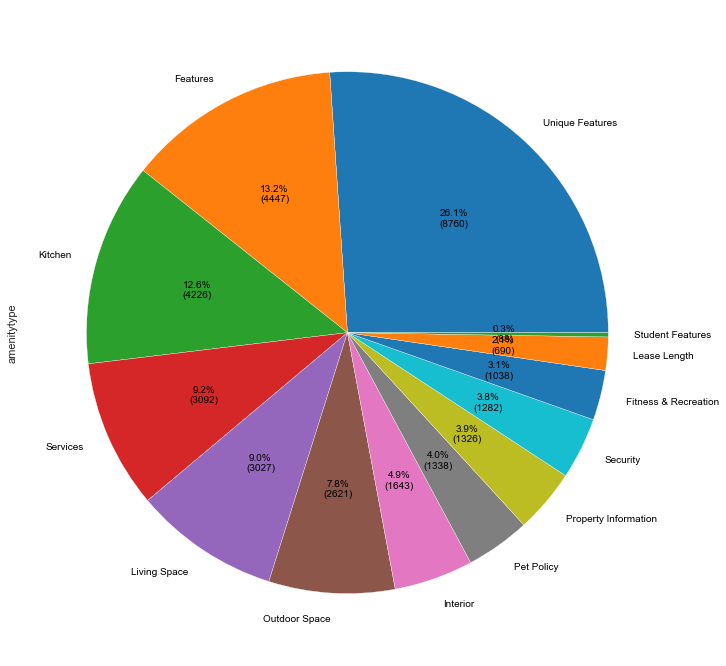

In [36]:
vendor_amenities.amenitytype.value_counts().plot.pie(y='amenitytype', figsize=(12, 12), autopct=lambda pct: func(pct, vendor_amenities.amenitytype.value_counts()), textprops=dict(color="black"))

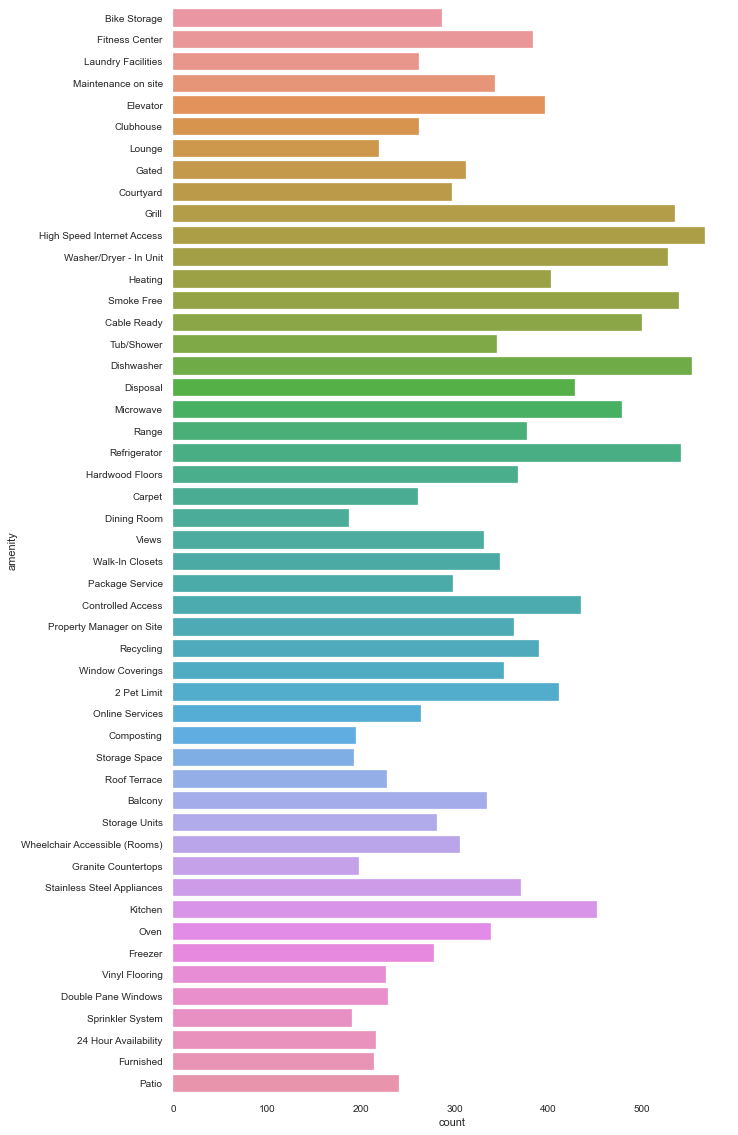

In [37]:
fig, ax = plt.subplots(figsize=(10,20))
top_n = vendor_amenities.amenity.value_counts(normalize=True).index[:50]
sns.countplot(
    y="amenity",
    data = (
        vendor_amenities.assign(
            amenity = vendor_amenities.amenity.where(
                vendor_amenities.amenity.isin(top_n)
            )
        )
    ),
)
    